# Step 1

1. The target variable for the red wine dataset is the quality of the wine based off of 11 variables relating to wine. This is also what the model will attempt to predict.

2. The dataset; "are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones)", from the description. This means in terms of classification, the dataset can be used to classify the data into discrete classes. Regression on the other hand evaluates the relationship between variables and some outcome in order to classify them


The following lines are other options to get the clone off git, 
as well as to directly download the dataset through providing the 
direct link

In [ ]:
# !git clone https://github.com/ShaunCahill/COMM493.git

# Step 2

Download the dataset, the directory can be passed in to specify where to save the data (i.e. "Comm493/Introduction to SageMaker Lab/Link to the website")

In [25]:
# !pip install opendatasets

In [4]:
# import opendatasets as od
  
# od.download(
#     "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

90112it [00:00, 208012.31it/s]                           


# Step 3

A business could use this dataset to see which variables have the most impact on the overall quality of the wine. For example, the matrix below highlights how alcohol has the highest correlation to the quality of wine. 

![alt text](https://miro.medium.com/max/1400/1*dhDaVItzF4dzxLlJ8Kyhlw.png "Logo Title Text 1")

Variable | *Citrix acid* | *density* | *quality* 
--- | --- | --- | ---
*Citrix acid* | *1* | *0.4* | *0.2*
*density* | *0.4* | *1* | *-0.2*
*quality* | *0.2* | *-0.2* | *1*

Other trends could be the high correlation with the density of the wine, along with the fixed acidity. Depending on the purpose of these experiments, this business could use these correlations to tune and predict what an "optimal" combination of factors would be. 

## Step 3.1

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('winequality-red.csv', sep=';')

## Step 3.3

In [39]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## Step 3.3

A more archaic way of semicolon seperation seen below

In [41]:
# data = pd.DataFrame()
# data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']] = \
# df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(";",expand=True)

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [42]:
# Convert all types to floats
data = data.astype('float64')

In [43]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [44]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


# Step 3.4

In [45]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


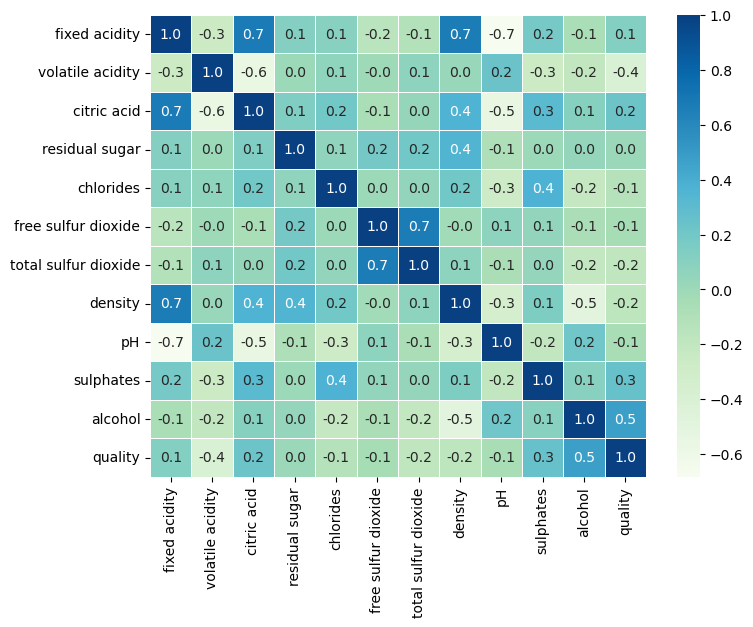

In [46]:
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(), cmap="GnBu", annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

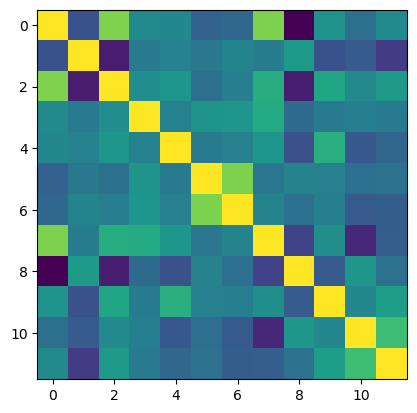

In [47]:
plt.imshow(data.corr(), interpolation='nearest')
plt.show()

In [48]:
data.corr().quality.sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

# Step 3.5

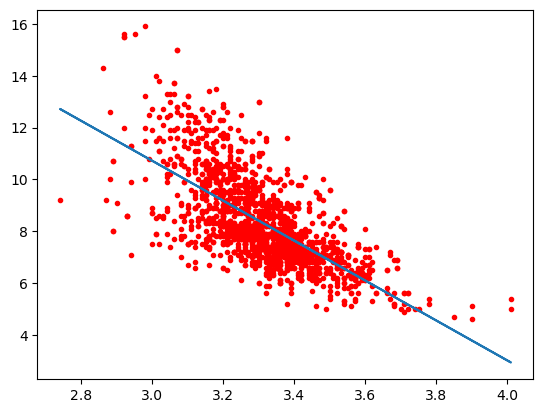

In [59]:
# Plot with matplotlib, strong positive correlation

plt.plot(data['pH'], data['fixed acidity'], '.', color='red');
plt.plot(data['pH'], a*data['pH']+b)        


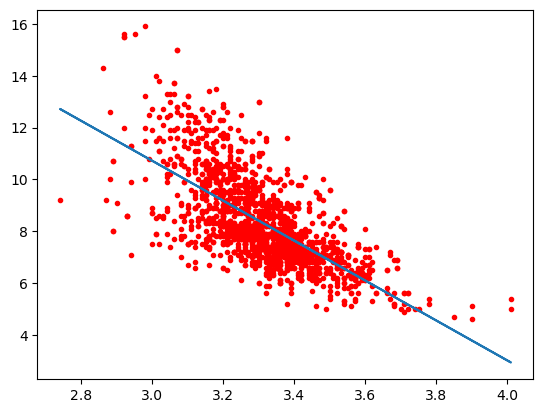

In [93]:
# Plot with matplotlib, strong negative correlation
a, b = np.polyfit(data['pH'], data['fixed acidity'], 1)

plt.plot(data['pH'], data['fixed acidity'], '.', color='red');
plt.plot(data['pH'], a*data['pH']+b)        


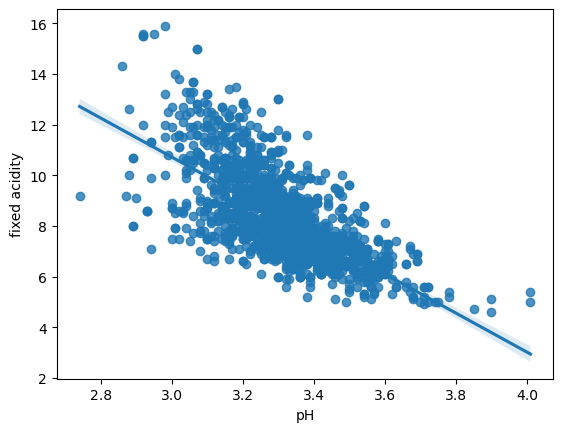

In [ ]:
# Plot with seaborn, strong negative correlation 

sns.regplot(x=data['pH'], y=data['fixed acidity'], data=data);


# Step 4.1

In [ ]:
y = data.loc[:,"quality"].values
x = data.drop(['quality'], axis = 1)

# Step 4.2

In [50]:
# Split the data into testing and training

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

# Step 4.3

In [51]:
# Create linear regression object

from sklearn import linear_model
logreg = linear_model.LogisticRegression(max_iter=150)

# Step 4.4

In [52]:
# Train the model using the training sets

logreg.fit(x_train,y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=150)

# Step 4.5

In [53]:
# Make predictions using the testing set

predicted = logreg.predict(x_test)

# Step 4.6

We can see the model only has a 55% accuracy on the test set. While this is quite low, there are a number of ways the model could be improved. While scikit learns website has great documentation on parameters that can be fit into the model, a few ones of note to play with would include; Number of iterations, tol (tolerance for stopping) and class_weight (Gives higher weights to things we believe are more important). 

In [54]:
# Show the accuracy of the model

print("Test accuracy: {} ".format(logreg.score(x_test, y_test)))

Test accuracy: 0.553030303030303 


In [ ]:
# Create a confusion Matrix to identify TP, FP, FN, TN

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,predicted)
cf_matrix

array([[  0,   0,   3,   0,   0,   0],
       [  0,   0,   9,   7,   1,   0],
       [  0,   0, 159,  71,   2,   0],
       [  0,   0,  72, 121,  13,   0],
       [  0,   0,   1,  51,  12,   0],
       [  0,   0,   0,   4,   2,   0]])

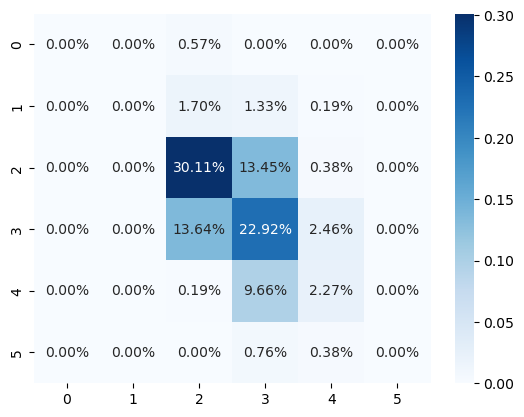

In [ ]:
# Create a heatmap of the Confusion Matrix

# cf_matrix = pd.crosstab(levels[y],levels[y_pred])
# fig, ax = plt.subplots(figsize=(5,5))
# sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

# cf_matrix = pd.crosstab(y_test,predicted)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

In [100]:
# Create your own DataFrame and run spcific predicitons
# Specify x_test[:n] where n is the number of columns you want to view

column_names = data.columns[:-1]
test_prediction_array = (x_test[:5].values.tolist())
test_prediciton_df = pd.DataFrame(test_prediction_array, columns=column_names)

test_prediciton_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,10.0,0.46,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2
1,9.5,0.57,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4
2,7.3,0.91,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2
3,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3
4,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,9.3


In [101]:
# Predicted values of quality 

logreg.predict(test_prediciton_df)

array([6., 5., 5., 7., 5.])

In [103]:
# Actual values of the quality of wine

Actual_values = y_test[:5]
Actual_values

array([6., 5., 5., 6., 5.])